In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from zipfile import ZipFile as zf
data=zf('/content/drive/MyDrive/AllAboutDataScience/Final Tetris/archive (8).zip')
data.extractall('/content')
data.close()

# Importing Data

In [4]:
df=pd.read_csv('/content/covid_19_indonesia_time_series_all.csv')
df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,100.00%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,...,0.511648,0.16,0.33,0.0,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,95.35%,1.0,1.0


# CLEANING

In [5]:
df.columns=['_'.join(i.lower().split(' ')) for i in df.columns]

In [6]:
df.columns

Index(['date', 'location_iso_code', 'location', 'new_cases', 'new_deaths',
       'new_recovered', 'new_active_cases', 'total_cases', 'total_deaths',
       'total_recovered', 'total_active_cases', 'location_level',
       'city_or_regency', 'province', 'country', 'continent', 'island',
       'time_zone', 'special_status', 'total_regencies', 'total_cities',
       'total_districts', 'total_urban_villages', 'total_rural_villages',
       'area_(km2)', 'population', 'population_density', 'longitude',
       'latitude', 'new_cases_per_million', 'total_cases_per_million',
       'new_deaths_per_million', 'total_deaths_per_million',
       'total_deaths_per_100rb', 'case_fatality_rate', 'case_recovered_rate',
       'growth_factor_of_new_cases', 'growth_factor_of_new_deaths'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21759 entries, 0 to 21758
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         21759 non-null  object 
 1   location_iso_code            21759 non-null  object 
 2   location                     21759 non-null  object 
 3   new_cases                    21759 non-null  int64  
 4   new_deaths                   21759 non-null  int64  
 5   new_recovered                21759 non-null  int64  
 6   new_active_cases             21759 non-null  int64  
 7   total_cases                  21759 non-null  int64  
 8   total_deaths                 21759 non-null  int64  
 9   total_recovered              21759 non-null  int64  
 10  total_active_cases           21759 non-null  int64  
 11  location_level               21759 non-null  object 
 12  city_or_regency              0 non-null      float64
 13  province        

In [8]:
import datetime
from datetime import date 
dummy=[]
for i in df['date']:
  tahun=int(i.split('/')[2])
  bulan=int(i.split('/')[0])
  tanggal=int(i.split('/')[1])
  dummy+=[datetime.date(tahun, bulan, tanggal)]
df['date']=pd.to_datetime(dummy)

In [9]:
df['case_fatality_rate']=df['case_fatality_rate'].apply(lambda x : float(x.split("%")[0])/100)
df['case_recovered_rate']=df['case_recovered_rate'].apply(lambda x : float(x.split("%")[0])/100)

In [10]:
df.columns

Index(['date', 'location_iso_code', 'location', 'new_cases', 'new_deaths',
       'new_recovered', 'new_active_cases', 'total_cases', 'total_deaths',
       'total_recovered', 'total_active_cases', 'location_level',
       'city_or_regency', 'province', 'country', 'continent', 'island',
       'time_zone', 'special_status', 'total_regencies', 'total_cities',
       'total_districts', 'total_urban_villages', 'total_rural_villages',
       'area_(km2)', 'population', 'population_density', 'longitude',
       'latitude', 'new_cases_per_million', 'total_cases_per_million',
       'new_deaths_per_million', 'total_deaths_per_million',
       'total_deaths_per_100rb', 'case_fatality_rate', 'case_recovered_rate',
       'growth_factor_of_new_cases', 'growth_factor_of_new_deaths'],
      dtype='object')

In [11]:
data=df.drop(['location_iso_code','city_or_regency', 'province', 'country', 'continent','special_status','total_regencies', 'total_cities',
       'total_districts', 'total_urban_villages', 'total_rural_villages',
       'area_(km2)','new_cases_per_million', 'total_cases_per_million',
       'new_deaths_per_million', 'total_deaths_per_million',
       'total_deaths_per_100rb','time_zone'], axis=1)
pd.set_option('display.max_columns', None)

In [12]:
data.head()

,date,location,new_cases,new_deaths,new_recovered,new_active_cases,total_cases,total_deaths,total_recovered,total_active_cases,location_level,island,population,population_density,longitude,latitude,case_fatality_rate,case_recovered_rate,growth_factor_of_new_cases,growth_factor_of_new_deaths
0,2020-03-01,DKI Jakarta,2,0,0,2,39,20,41,-22,Province,Jawa,10846145,16334.31,106.836118,-6.204699,0.5128,1.0513,NaN,NaN
1,2020-03-02,DKI Jakarta,2,0,0,2,41,20,41,-20,Province,Jawa,10846145,16334.31,106.836118,-6.204699,0.4878,1.0000,1.0,1.0
2,2020-03-02,Indonesia,2,0,0,2,2,0,0,2,Country,NaN,265185520,138.34,113.921327,-0.789275,0.0000,0.0000,NaN,NaN
3,2020-03-02,Riau,1,0,0,1,2,0,3,-1,Province,Sumatera,6074100,69.80,101.805109,0.511648,0.0000,1.5000,NaN,NaN
4,2020-03-03,DKI Jakarta,2,0,0,2,43,20,41,-18,Province,Jawa,10846145,16334.31,106.836118,-6.204699,0.4651,0.9535,1.0,1.0


In [13]:
data['location'].value_counts()

DKI Jakarta                   642
Indonesia                     642
Riau                          641
Jawa Barat                    640
Banten                        637
Jawa Tengah                   635
Sulawesi Tenggara             633
Bali                          632
Kalimantan Timur              629
Daerah Istimewa Yogyakarta    627
Sumatera Utara                626
Jawa Timur                    625
Sulawesi Selatan              624
Jambi                         623
Kepulauan Riau                623
Papua                         621
Maluku                        620
Sumatera Selatan              620
Aceh                          617
Kalimantan Tengah             617
Lampung                       617
Sulawesi Tengah               617
Sulawesi Utara                617
Sumatera Barat                617
Papua Barat                   616
Maluku Utara                  616
Kalimantan Utara              614
Sulawesi Barat                614
Kalimantan Barat              614
Kalimantan Sel

In [14]:
round(data.isnull().sum()/len(df),2)

date                           0.00
location                       0.00
new_cases                      0.00
new_deaths                     0.00
new_recovered                  0.00
new_active_cases               0.00
total_cases                    0.00
total_deaths                   0.00
total_recovered                0.00
total_active_cases             0.00
location_level                 0.00
island                         0.03
population                     0.00
population_density             0.00
longitude                      0.00
latitude                       0.00
case_fatality_rate             0.00
case_recovered_rate            0.00
growth_factor_of_new_cases     0.05
growth_factor_of_new_deaths    0.11
dtype: float64

In [15]:
data[data['island'].isnull()]['location'].value_counts()
# Island memiliki data kosong dikarenaka pada data berlokasi di 'indonesia' yang mengakibatkan ambiguitas

Indonesia    642
Name: location, dtype: int64

## Feature Imputation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


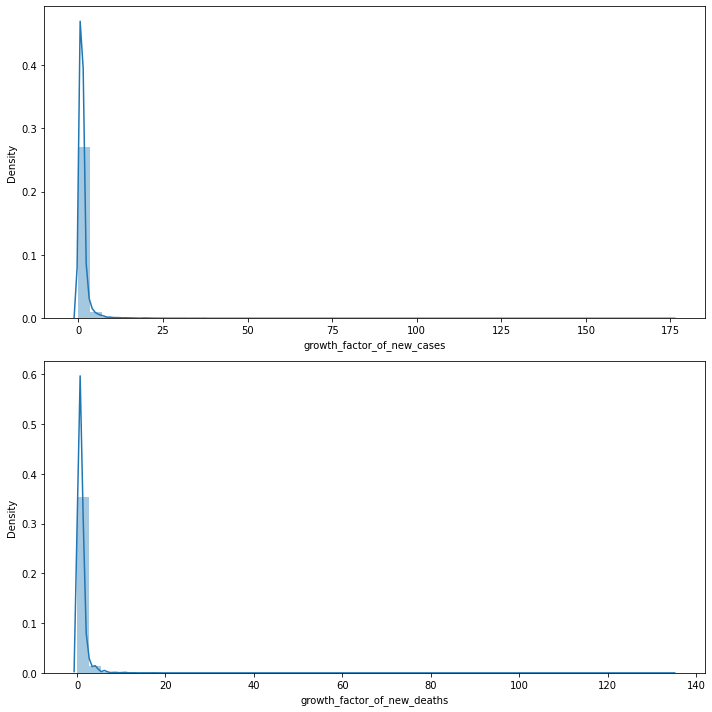

In [16]:
plt.figure(figsize=(10,10))
check=['growth_factor_of_new_cases','growth_factor_of_new_deaths']
for i in range(0,2):
  plt.subplot(2,1,i+1)
  sns.distplot(data[check[i]])
  plt.tight_layout()
plt.show()

In [17]:
data[['growth_factor_of_new_cases','growth_factor_of_new_deaths']].describe()
# Diketahui untuk pertumbuhan new cases dan pertumbuhan kematian mendekati distribusi normal dikarenakan mean dan median saling mendekati"

,growth_factor_of_new_cases,growth_factor_of_new_deaths
count,20572.000000,19292.000000
mean,1.395671,1.074145
std,3.080207,1.578502
min,0.000000,0.000000
25%,0.650000,0.660000
50%,0.990000,1.000000
75%,1.330000,1.000000
max,175.000000,134.500000


In [18]:
check=['growth_factor_of_new_cases','growth_factor_of_new_deaths']
for i in check:
  data[i]=data[i].fillna(data[i].mean())

In [19]:
data.isnull().sum()

date                             0
location                         0
new_cases                        0
new_deaths                       0
new_recovered                    0
new_active_cases                 0
total_cases                      0
total_deaths                     0
total_recovered                  0
total_active_cases               0
location_level                   0
island                         642
population                       0
population_density               0
longitude                        0
latitude                         0
case_fatality_rate               0
case_recovered_rate              0
growth_factor_of_new_cases       0
growth_factor_of_new_deaths      0
dtype: int64

## Outlier Cleaning

In [20]:
kategorikal=data.select_dtypes(include='O').columns
numerikal=data.select_dtypes(exclude='O').columns

In [21]:
numerikal2=[i for i in numerikal if i not in ('date','latitude','longitude')]
numerikal2

['new_cases',
 'new_deaths',
 'new_recovered',
 'new_active_cases',
 'total_cases',
 'total_deaths',
 'total_recovered',
 'total_active_cases',
 'population',
 'population_density',
 'case_fatality_rate',
 'case_recovered_rate',
 'growth_factor_of_new_cases',
 'growth_factor_of_new_deaths']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

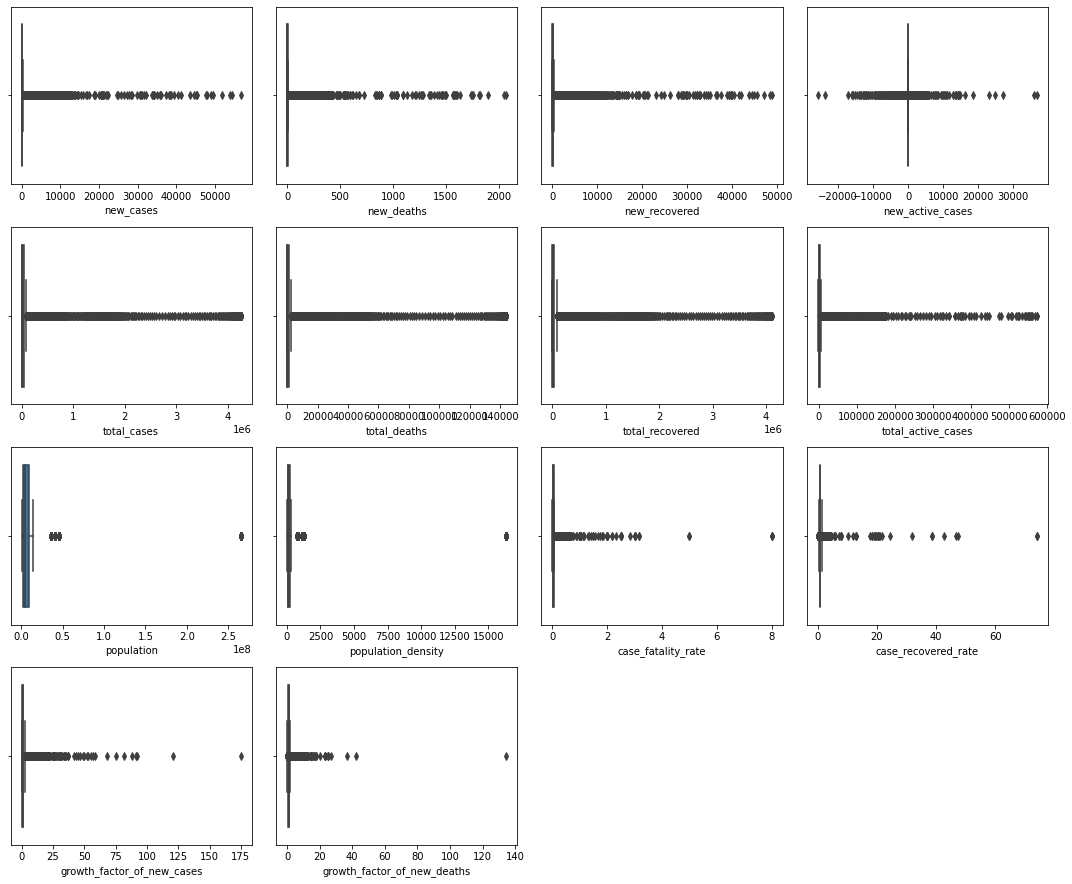

In [22]:
plt.figure(figsize=(15,15))
for i in range(len(numerikal2)):
  plt.subplot(5,4,i+1)
  sns.boxplot(data[numerikal2[i]])
  plt.tight_layout()
plt.show()
# Dikarenakan IQR dan Outlier variasi maka outlier cleaning dengan pendekatan Z Score

In [23]:
filtering1=np.array(True*len(data))
for i in range(len(numerikal2)):
  Q3=data[numerikal2[i]].quantile(0.75)
  Q1=data[numerikal2[i]].quantile(0.25)
  IQR=Q3-Q1
  atas=Q3+(1.5*IQR)
  bawah=Q1-(1.5*IQR)
  filtering1=((df[numerikal2[i]] >= bawah) &(df[numerikal2[i]] <= atas)) & filtering1

In [24]:
filtering1.value_counts()

False    16087
True      5672
dtype: int64

In [25]:
data_new=data[filtering1]

In [26]:
data_new.head()

,date,location,new_cases,new_deaths,new_recovered,new_active_cases,total_cases,total_deaths,total_recovered,total_active_cases,location_level,island,population,population_density,longitude,latitude,case_fatality_rate,case_recovered_rate,growth_factor_of_new_cases,growth_factor_of_new_deaths
84,2020-03-15,Kalimantan Timur,2,0,0,2,5,0,2,3,Province,Kalimantan,3552191,27.52,116.46844,0.453858,0.0,0.4000,0.67,1.0
94,2020-03-16,Kalimantan Timur,1,0,0,1,6,0,2,4,Province,Kalimantan,3552191,27.52,116.46844,0.453858,0.0,0.3333,0.50,1.0
104,2020-03-17,Kalimantan Timur,1,0,0,1,7,0,2,5,Province,Kalimantan,3552191,27.52,116.46844,0.453858,0.0,0.2857,1.00,1.0
116,2020-03-18,Kalimantan Timur,0,0,0,0,7,0,2,5,Province,Kalimantan,3552191,27.52,116.46844,0.453858,0.0,0.2857,0.00,1.0
128,2020-03-19,Kalimantan Timur,0,0,0,0,7,0,2,5,Province,Kalimantan,3552191,27.52,116.46844,0.453858,0.0,0.2857,1.00,1.0


# Vizualitation

Pada Visualisasi menggunakan datafram "Data" diakibatkan pada dataset ini terjadi lonjakan nilai outlier karena ada error location yang mencakup "Indonesia" atau 1 negara

In [27]:
data_visual=data[data['location'] != 'Indonesia']
visualisasi1=data_visual.drop_duplicates(subset='location', keep='last')
visualisasi1=visualisasi1.sort_values('total_cases', ascending=False).iloc[0:7,:]

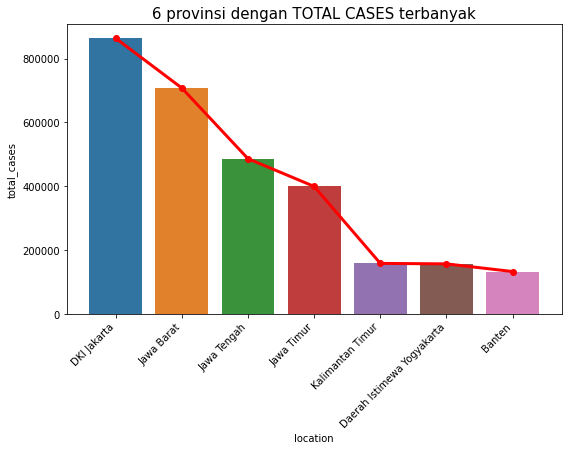

In [28]:
plt.figure(figsize=(8,5))
sns.barplot(x=visualisasi1['location'], y=visualisasi1['total_cases'])
plt.plot(visualisasi1['location'], visualisasi1['total_cases'],color='r',linewidth=3,marker='o')
plt.title('6 provinsi dengan TOTAL CASES terbanyak', fontsize=15)
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

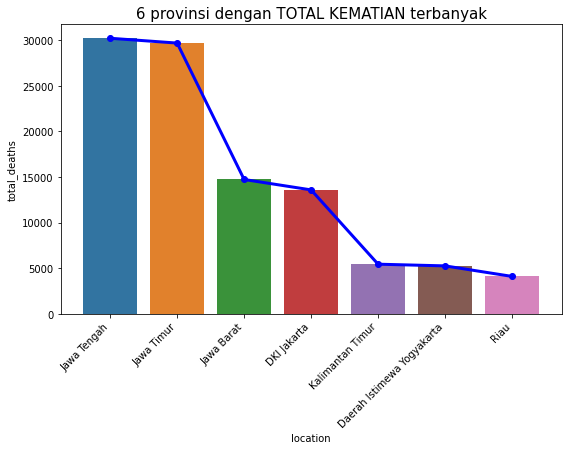

In [29]:
# Visualisasi total deaths
visualisasi2=data_visual.drop_duplicates(subset='location', keep='last')
visualisasi2=visualisasi2.sort_values('total_deaths', ascending=False).iloc[0:7,:]
plt.figure(figsize=(8,5))
sns.barplot(x=visualisasi2['location'], y=visualisasi2['total_deaths'])
plt.plot(visualisasi2['location'], visualisasi2['total_deaths'],color='b',linewidth=3,marker='o')
plt.title('6 provinsi dengan TOTAL KEMATIAN terbanyak', fontsize=15)
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

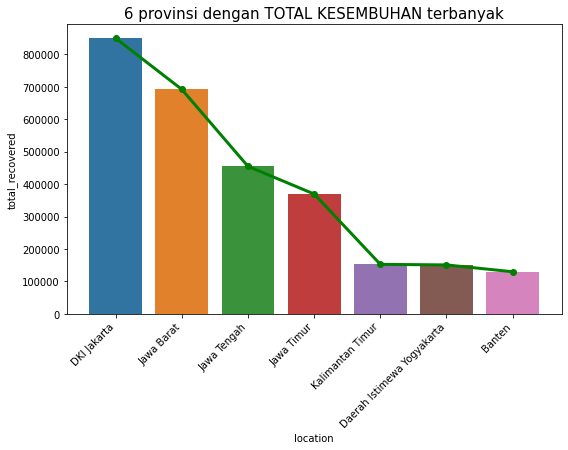

In [30]:
# Visualisasi total kesembuahn
visualisasi3=data_visual.drop_duplicates(subset='location', keep='last')
visualisasi3=visualisasi3.sort_values('total_recovered', ascending=False).iloc[0:7,:]
plt.figure(figsize=(8,5))
sns.barplot(x=visualisasi3['location'], y=visualisasi3['total_recovered'])
plt.plot(visualisasi3['location'], visualisasi3['total_recovered'],color='g',linewidth=3,marker='o')
plt.title('6 provinsi dengan TOTAL KESEMBUHAN terbanyak', fontsize=15)
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

In [31]:
visualisasi4=data_visual.drop_duplicates(subset='location', keep='last').sort_values('total_cases', ascending=False)[['date','location','total_cases','population','total_recovered','total_deaths']]
plt.figure(figsize=(15,10))
from sklearn.preprocessing import StandardScaler
standar=StandardScaler()
visualisasi4[['total_cases','population','total_recovered','total_deaths']]=abs(standar.fit_transform(visualisasi4[['total_cases','population','total_recovered','total_deaths']]))
visualisasi4=visualisasi4.iloc[0:7,:]
visualisasi4 # Tabel 6 urutan terbesar berdasarkan total kasus yang sudah mengamalami standarisasi dengan StandardScaler

,date,location,total_cases,population,total_recovered,total_deaths
21733,2021-12-02,DKI Jakarta,3.815521,0.282766,3.877092,1.303006
21737,2021-12-02,Jawa Barat,3.009332,3.467709,3.038164,1.461770
21738,2021-12-02,Jawa Tengah,1.865466,2.651197,1.776567,3.616847
21739,2021-12-02,Jawa Timur,1.416403,3.033124,1.323003,3.543378
21743,2021-12-02,Kalimantan Timur,0.170626,0.394218,0.170096,0.169393
21734,2021-12-02,Daerah Istimewa Yogyakarta,0.163004,0.386902,0.160796,0.143512
21732,2021-12-02,Banten,0.038670,0.271278,0.048639,0.214787


<Figure size 1080x720 with 0 Axes>

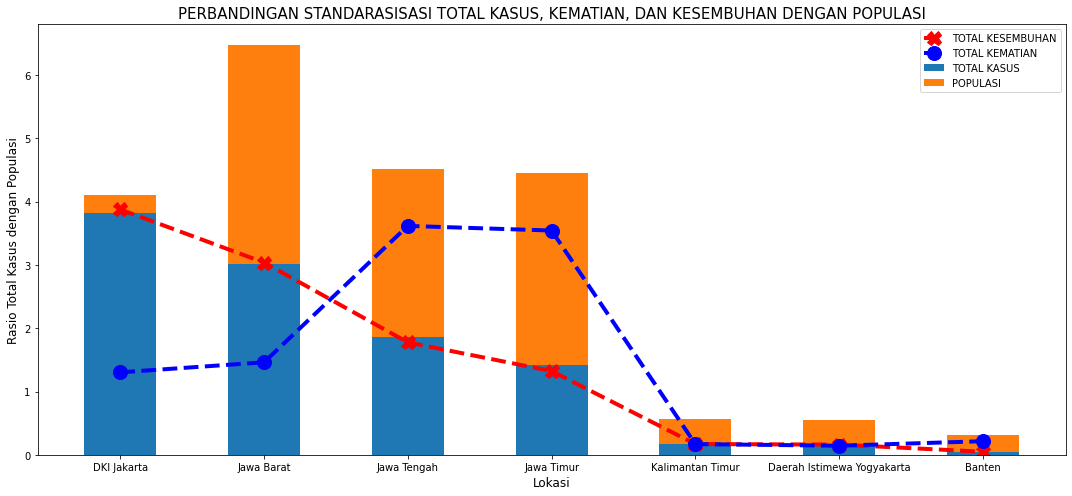

In [32]:
plt.figure(figsize=(15,7))
total_kasus=visualisasi4['total_cases'].to_list()
populasi=visualisasi4['population'].to_list()
sembuh=visualisasi4['total_recovered'].to_list()
kematian=visualisasi4['total_deaths'].to_list()

x=visualisasi4['location'].to_list()
plt.bar(x, total_kasus, 0.5,label='TOTAL KASUS')
plt.bar(x, populasi, 0.5,bottom=total_kasus,label='POPULASI')
plt.plot(x,sembuh,linewidth=4, marker='X',markersize=14, color='red',linestyle='dashed', label='TOTAL KESEMBUHAN')
plt.plot(x,kematian,linewidth=4, marker='o',markersize=14, color='blue',linestyle='dashed', label='TOTAL KEMATIAN')

plt.title('PERBANDINGAN STANDARASISASI TOTAL KASUS, KEMATIAN, DAN KESEMBUHAN DENGAN POPULASI', fontsize=15)
plt.legend()
plt.xlabel('Lokasi',fontsize=12)
plt.ylabel('Rasio Total Kasus dengan Populasi',fontsize=12)
plt.tight_layout()
plt.show()

Pada akhir terpantaunya data perkembangan Covid19 di dataset ini, yaitu pada tanggal 2 Desember 2021 didapati bahwa 'severity' atau tingkat keparahan yang kita lihat dari perbandingan populasi, total kasus, total kesembuhan, dan total kematian yang memiliki perbandingan yang cukup di posisi pertama ada Jawa Tengah, kemudian Jawa Timur, DKI Jakarta, yang kemudian disusul oleh Jawa Barat

In [33]:
def pertumbuhan(x):
  plt.plot(x['date'], x['new_cases'], label='KASUS BARU')
  plt.plot(x['date'], x['new_deaths'], label='KASUS KEMATIAN')
  plt.plot(x['date'], x['new_recovered'], label='KASUS PENYEMBUHAN')
  plt.legend()

In [34]:
data_visual1=data_visual[data_visual['date'] > '2021-05-01']
dki_jakarta=data_visual1[data_visual1['location']=='DKI Jakarta']
jawa_tengah=data_visual1[data_visual1['location']=='Jawa Tengah']
jawa_timur=data_visual1[data_visual1['location']=='Jawa Timur']
jawa_barat=data_visual1[data_visual1['location']=='Jawa Barat']

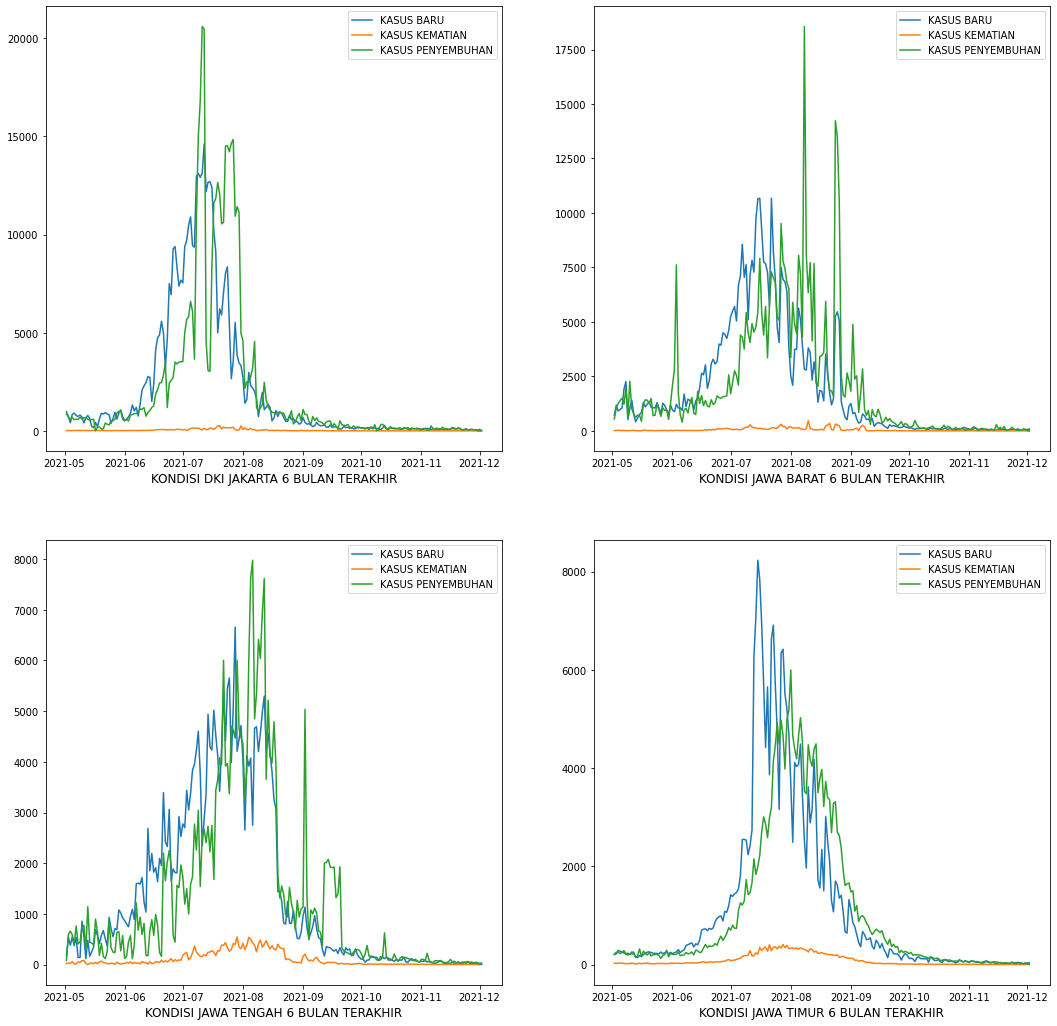

In [35]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
pertumbuhan(dki_jakarta)
plt.xlabel('KONDISI DKI JAKARTA 6 BULAN TERAKHIR', fontsize=12)

plt.subplot(2,2,2)
pertumbuhan(jawa_barat)
plt.xlabel('KONDISI JAWA BARAT 6 BULAN TERAKHIR', fontsize=12)

plt.subplot(2,2,3)
pertumbuhan(jawa_tengah)
plt.xlabel('KONDISI JAWA TENGAH 6 BULAN TERAKHIR', fontsize=12)

plt.subplot(2,2,4)
pertumbuhan(jawa_timur)
plt.xlabel('KONDISI JAWA TIMUR 6 BULAN TERAKHIR', fontsize=12)

plt.show()

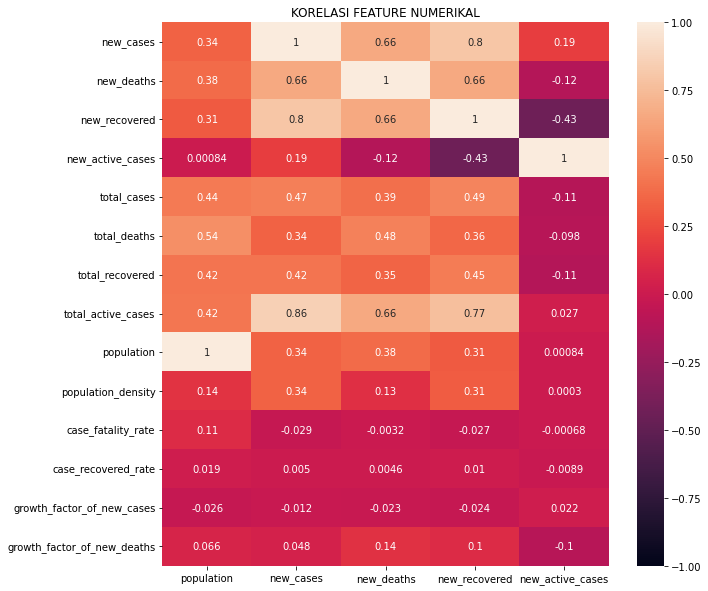

In [36]:
data_heatmap=data_visual[numerikal].drop(['date','latitude','longitude'], axis=1).corr()[['population',
                                                                             'new_cases','new_deaths','new_recovered',
                                                                             'new_active_cases']]

plt.figure(figsize=(10,10))
sns.heatmap(data_heatmap, annot=True, vmin=-1, vmax=1)
plt.title('KORELASI FEATURE NUMERIKAL')
plt.show()

# Label/Output Forecasting

## ML Modeling -- LinearRegression  

In [37]:
kategorikal

Index(['location', 'location_level', 'island'], dtype='object')

In [38]:
numerikal

Index(['date', 'new_cases', 'new_deaths', 'new_recovered', 'new_active_cases',
       'total_cases', 'total_deaths', 'total_recovered', 'total_active_cases',
       'population', 'population_density', 'longitude', 'latitude',
       'case_fatality_rate', 'case_recovered_rate',
       'growth_factor_of_new_cases', 'growth_factor_of_new_deaths'],
      dtype='object')

In [39]:
X=data_visual[['population', 'new_cases', 'case_fatality_rate', 'new_recovered','total_cases', 
               'total_deaths', 'total_recovered','total_active_cases']] # Variabel dependents
Y=data_visual['new_deaths'] # Variable Independents
# Di sini kita akan melakukan forecasting sebuah daerah yang memiliki profil seperti pada variabel X untuk forecasting jumlah 
# kematian saat itu

In [40]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test=train_test_split(X, Y, test_size=0.2, random_state=42)

In [41]:
from sklearn.preprocessing import StandardScaler
standard=StandardScaler()
x_train=standard.fit_transform(x_train)
x_test=standard.fit_transform(x_test)

In [42]:
from sklearn.linear_model import LinearRegression

linear=LinearRegression()
linear.fit(x_train, y_train)

LinearRegression()

In [43]:
y_prediction=linear.predict(x_test)
y_prediction

array([ 2.30152366, -0.70446008,  2.13190873, ...,  4.37309229,
        1.21023019,  0.04285166])

## Model Evaluation -- LinearRegression

In [44]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
def matriks_evaluasi(testing, prediksi):
  print('Nilai Mean Absolute Error (MAE) = {}'.format(mean_absolute_error(testing, prediksi)))
  print('Nilai Mean Squared Error (MSE) = {}'.format(mean_squared_error(testing, prediksi)))
  print('Nilai Score atau R2_score = {}'.format(r2_score(testing, prediksi)))
def nilai_evaluasi(testing, prediksi):
  MAE=mean_absolute_error(testing, prediksi)
  MSE=mean_squared_error(testing, prediksi)
  R2=r2_score(testing, prediksi)
  return MAE, MSE, R2

In [45]:
matriks_evaluasi(y_test, linear.predict(x_test))

Nilai Mean Absolute Error (MAE) = 4.759242317069546
Nilai Mean Squared Error (MSE) = 234.08809026691995
Nilai Score atau R2_score = 0.6373258178991235


In [46]:
table_model=pd.DataFrame(data=['Linear Regression'] + list(nilai_evaluasi(y_test, linear.predict(x_test))), 
             index=['Model','MAE','MSE','R2']).T
table_model

,Model,MAE,MSE,R2
0,Linear Regression,4.759242,234.08809,0.637326


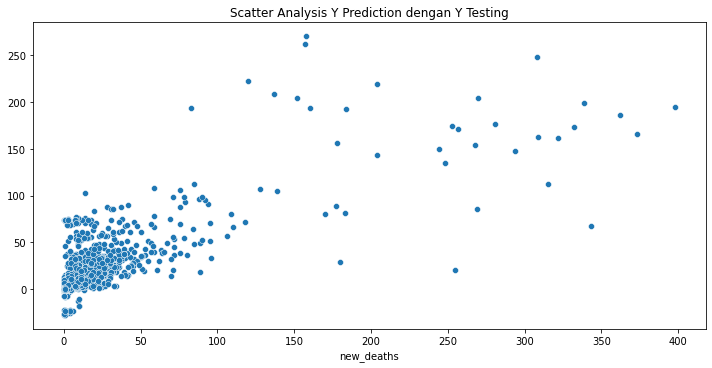

In [47]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=y_test, y=y_prediction)
plt.tight_layout()
plt.title('Scatter Analysis Y Prediction dengan Y Testing', fontsize=12)
plt.show()

In [48]:
table_koef_linear=pd.DataFrame(data=linear.coef_, index=X.columns.to_list(), columns=['Koefisien Regresi Linear'])
table_koef_linear

,Koefisien Regresi Linear
population,0.217731
new_cases,5.021293
case_fatality_rate,0.217040
new_recovered,7.324767
total_cases,-4.021284
total_deaths,13.126279
total_recovered,-5.290450
total_active_cases,7.023441


In [49]:
linear.score(x_test,y_test)

0.6373258178991235

In [50]:
linear.score(x_train,y_train)

0.5796751682451028

## ML Modeling -- Lasso

In [51]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.2,
            precompute=True,
            selection='random',
            random_state=42)
lasso.fit(x_train, y_train)

Lasso(alpha=0.2, precompute=True, random_state=42, selection='random')

In [52]:
y_prediction_lasso=lasso.predict(x_test)
y_prediction_lasso

array([ 2.29241905, -0.6534723 ,  2.00645277, ...,  4.24063981,
        1.28600665,  0.04903727])

## Model Evaluation -- Lasso

In [53]:
def matriks_evaluasi_lasso(testing, prediksi):
  print('Nilai Mean Absolute Error (MAE) Lasso = {}'.format(mean_absolute_error(testing, prediksi)))
  print('Nilai Mean Squared Error (MSE) Lasso = {}'.format(mean_squared_error(testing, prediksi)))
  print('Nilai Score atau R2_score Lasso = {}'.format(r2_score(testing, prediksi)))

matriks_evaluasi_lasso(y_test,y_prediction_lasso)

Nilai Mean Absolute Error (MAE) Lasso = 4.675421059874235
Nilai Mean Squared Error (MSE) Lasso = 233.71755600288202
Nilai Score atau R2_score Lasso = 0.6378998890148179


In [54]:
data_lasso=pd.DataFrame(data=['Lasso'] + list(nilai_evaluasi(y_test, y_prediction_lasso)),
            index=['Model','MAE','MSE','R2']).T
data_lasso

,Model,MAE,MSE,R2
0,Lasso,4.675421,233.717556,0.6379


In [55]:
pd.concat([table_model, data_lasso]).set_index('Model')
# Perbandingan performansi Linear Regression dengan Lasso model 

,MAE,MSE,R2
Model,,,
Linear Regression,4.759242,234.08809,0.637326
Lasso,4.675421,233.717556,0.6379
